In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [47]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [48]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [49]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [50]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [52]:
 inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [37]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

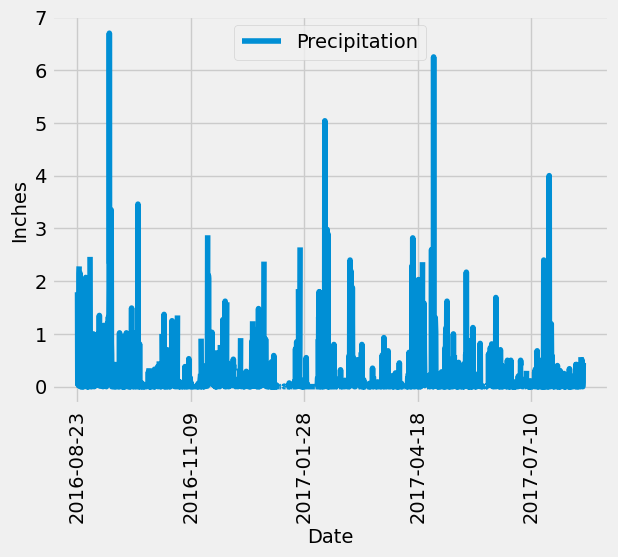

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017 , 8, 23)

# Calculate the date one year from the last date in data set.
one_year_date = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date , Measurement.prcp).\
    filter(Measurement.date >= one_year_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column name
precipitation = pd.DataFrame(result, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
precipitation.sort_values("Date")
precipitation.set_index('Date', inplace=True)
precipitation = precipitation.sort_index()
precipitation.plot()
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.show()
# Use Pandas Plotting with Matplotlib to plot the data


In [94]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [98]:
 inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [99]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [106]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count_desc_order = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station, count in station_count_desc_order:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [118]:
active_station = station_count_desc_order[0][0]
print(active_station)

USC00519281


In [128]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_max_avg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == active_station).all()
min_max_avg

[(54.0, 85.0, 71.66378066378067)]

In [134]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and 
temperature_observation = session.query(Measurement.tobs).\
    filter(Measurement.station == active_station).\
    filter(Measurement.date >= one_year_date).all()
temperature_data = pd.DataFrame(temperature_observation, columns= ['Temperature'])
temperature_data

,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


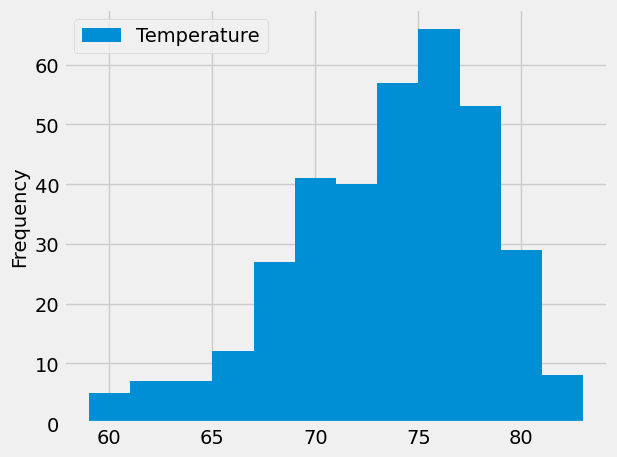

In [136]:
#plot the results as a histogram
temperature_data.plot.hist(bins=12)
plt.tight_layout()

# Close Session

In [16]:
# Close Session
session.close()